### K-means - Clustering

In [84]:
import re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Carda dataset de flores

In [3]:
iris = datasets.load_iris()

Separación de datos, Y_iris contiene la clasificación

In [4]:
X_iris = iris.data
Y_iris = iris.target

In [6]:
x = pd.DataFrame(iris.data, columns=['Sepal Lenght', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [7]:
x.head()

,Sepal Lenght,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


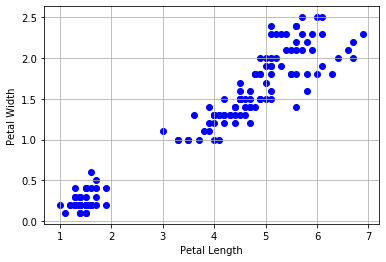

In [12]:
plt.scatter(x['Petal Length'], x['Petal Width'], c='blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.grid()
plt.show()

Entrenamiento del modelo.

**Parametros**
- Numero de clusters
- Iteraciones

In [34]:
kmeans_model = KMeans(n_clusters=3, max_iter=1000)
kmeans_model.fit(x)


KMeans(max_iter=1000, n_clusters=3)

Evaluando la prediccion del modelo. Devuelve un array con el cluster de cada muestra

In [35]:
y_kmeans = kmeans_model.predict(x)

In [31]:
accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy)

0.7302382722834697


Text(0, 0.5, 'Petal Width')

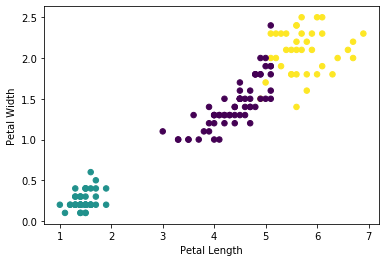

In [36]:
plt.scatter(x['Petal Length'], x['Petal Width'], c=y_kmeans, s=30)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

In [88]:
wccs =[] #Within-Cluster Sum of Square
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters = i, max_iter = 1000, random_state = 0)
    kmeans_model.fit(x)
    y_kmeans = kmeans_model.predict(x)
    wccs.append(kmeans_model.inertia_)

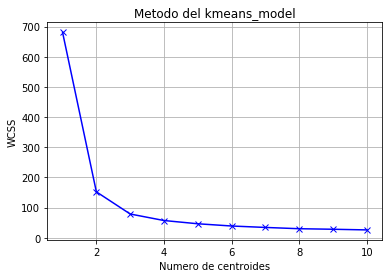

In [92]:
plt.plot(range(1, 11), wccs, 'bx-')
plt.title('Metodo del kmeans_model')
plt.xlabel('Numero de centroides')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [45]:
wines = datasets.load_wine()
X_wine = wines.data
Y_wine = wines.target

In [54]:
X_wine.shape

(178, 13)

In [55]:
Y_wine.shape

(178,)

In [70]:
X_wine[0:6,0:5]


array([[ 14.23,   1.71,   2.43,  15.6 , 127.  ],
       [ 13.2 ,   1.78,   2.14,  11.2 , 100.  ],
       [ 13.16,   2.36,   2.67,  18.6 , 101.  ],
       [ 14.37,   1.95,   2.5 ,  16.8 , 113.  ],
       [ 13.24,   2.59,   2.87,  21.  , 118.  ],
       [ 14.2 ,   1.76,   2.45,  15.2 , 112.  ]])

In [85]:
scaler = MinMaxScaler() 
scaler.fit(X_wine)
X_norm = scaler.transform(X_wine)
X_norm[0:6,0:5]

array([[0.84210526, 0.1916996 , 0.57219251, 0.25773196, 0.61956522],
       [0.57105263, 0.2055336 , 0.4171123 , 0.03092784, 0.32608696],
       [0.56052632, 0.3201581 , 0.70053476, 0.41237113, 0.33695652],
       [0.87894737, 0.23913043, 0.60962567, 0.31958763, 0.4673913 ],
       [0.58157895, 0.36561265, 0.80748663, 0.53608247, 0.52173913],
       [0.83421053, 0.20158103, 0.5828877 , 0.2371134 , 0.45652174]])

In [77]:
scaler = StandardScaler()
scaler.fit(X_wine)
X_scaled = scaler.transform(X_wine)
X_scaled[0:6,0:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515],
       [ 1.48155459, -0.51736664,  0.30515936, -1.28970717,  0.86070511]])

In [78]:
kmeans_model = KMeans(n_clusters=3, max_iter=1000)
kmeans_model.fit(X_wine)
y_kmeans = kmeans_model.predict(X_wine)
accuracy = metrics.adjusted_rand_score(Y_wine, y_kmeans)
print(accuracy)

0.37111371823084754


In [86]:
kmeans_model = KMeans(n_clusters=3, max_iter=1000)
kmeans_model.fit(X_norm)
y_kmeans = kmeans_model.predict(X_norm)
accuracy = metrics.adjusted_rand_score(Y_wine, y_kmeans)
print(accuracy)

0.8368448733145885


In [82]:
kmeans_model = KMeans(n_clusters=3, max_iter=1000)
kmeans_model.fit(X_scaled)
y_kmeans = kmeans_model.predict(X_scaled)
accuracy = metrics.adjusted_rand_score(Y_wine, y_kmeans)
print(accuracy)

0.8974949815093207
